# Part 4: Bias-Variance Tradeoff

The Bias-Variance Tradeoff describes the tension between two sources of error that prevent supervised learning algorithms from generalizing beyond their training set:

**Bias (Underfitting)**: Error introduced by approximating a real-world problem, which may be complex, by a much simpler model. High bias can cause an algorithm to miss the relevant relations between features and target outputs (e.g., Degree 1).

**Variance (Overfitting**): Error introduced by the model's sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data rather than the intended outputs (e.g., Degree 15).

Our goal is to find the "sweet spot" where total error is minimized. Strategies to achieve this include tuning model complexity (as seen below), increasing training data, or using regularization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(0)
n_samples = 30

In [2]:
# We test three degrees to illustrate the tradeoff:
# Degree 1: High Bias (Underfitting)
# Degree 4: Balanced (Good Generalization)
# Degree 15: High Variance (Overfitting)
degrees = [1, 4, 15] 

X = np.sort(np.random.rand(n_samples))
y = np.cos(1.5 * np.pi * X) + np.random.randn(n_samples) * 0.1

X = X[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

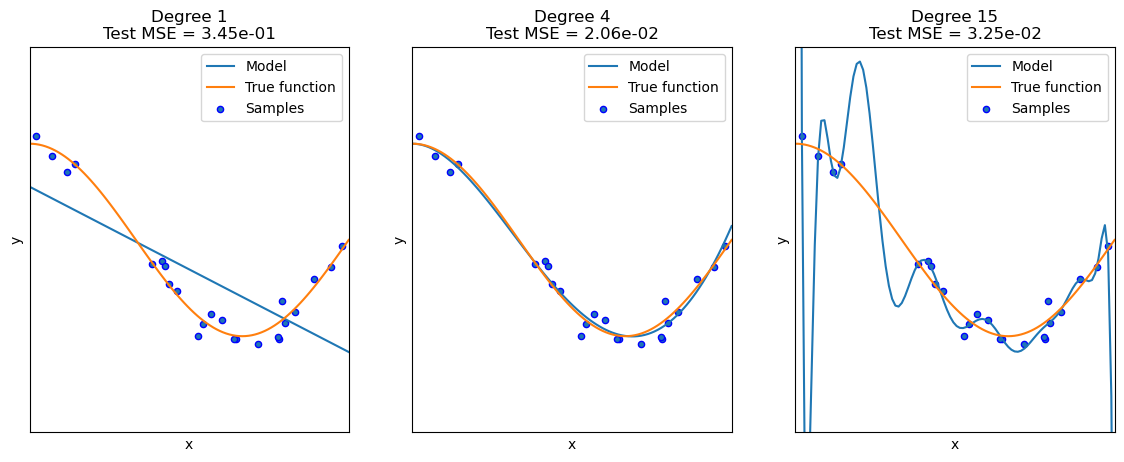

In [3]:
# --- Visualization of the Tradeoff ---
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Create pipeline: Polynomial features increase complexity, Linear Regression fits it
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = make_pipeline(polynomial_features, linear_regression)
    
    pipeline.fit(X_train, y_train)

    # Evaluate: High error on test set can indicate either high bias or high variance
    scores = mean_squared_error(pipeline.predict(X_test), y_test)

    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, np.cos(1.5 * np.pi * X_plot), label="True function")
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    # Title shows the MSE. Note: High Variance models often show low training error but high test MSE.
    plt.title("Degree {}\nTest MSE = {:.2e}".format(degrees[i], scores))

plt.show()

In the plots above, you will see that the model with degree 1 has high bias and low variance, the model with degree 15 has low bias and high variance, and the model with degree 4 is trying to balance both.

## What is Bias? (Self-Study)

Bias refers to the error that is introduced by approximating a real-world problem, which may be complex, by a simplified model. In other words, it's the difference between the expected prediction of our model and the true values. High bias can cause the model to miss relevant relations between features and target outputs (also known as underfitting).

**Examples of High Bias:**
- Linear regression on non-linear data
- Assuming simplicity when the data has a more complex structure

## What is Variance?

Variance refers to the error that is introduced by the model's sensitivity to the fluctuations in the training dataset. A model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn't seen before (also known as overfitting).

**Examples of High Variance:**
- Fitting a high-degree polynomial to data with lots of fluctuations
- A complex decision tree that creates a branch for each data point

> We will learn more about decision tree in the next unit

## The Tradeoff

The bias-variance tradeoff is the balance between the error introduced by the bias and the variance. Ideally, we want to choose a model where both bias and variance are as low as possible. However, in practice, decreasing one will often increase the other. A model with high bias (simple models) will not be complex enough to capture the patterns in the data, leading to underfitting. Conversely, a model with high variance (complex models) will capture noise in the training data, leading to overfitting.

![bv-2](../assets/bv-tradeoff-2.png)

**Visual Representation**

Imagine a target that we are trying to hit with our predictions:

![bv](../assets/bv-tradeoff.png)

- High bias is when our predictions are consistently far off from the target.
- High variance is when our predictions are all over the place around the target.
- Low bias and low variance are when our predictions are consistently close to the target.

## Balancing Bias and Variance

To achieve a model that generalizes well, we need to find a sweet spot that minimizes both bias and variance.

**Techniques to Balance Bias and Variance:**

1. **Cross-validation**: Helps in assessing how the results of a statistical analysis will generalize to an independent dataset.
2. **Training with more data**: Helps to reduce variance without increasing bias.
3. **Feature selection**: Removing irrelevant features can reduce variance without increasing bias too much.
4. **Regularization**: Techniques like Lasso and Ridge can reduce variance at the cost of introducing some bias.
5. **Ensemble methods**: Combining predictions from several models can reduce both bias and variance.

> We will learn more about these techniques in the next unit.